In [13]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
import tensorflow as tf
import numpy as np
import lime
from lime import lime_image
import time


explainer = lime_image.LimeImageExplainer()

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
   model = tf.keras.models.load_model('/Users/timotheuskampik/Downloads/my_model_B_W.h5')

In [14]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(320, 320))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        out.append(x)
    return np.vstack(out)

In [15]:
images = transform_img_fn(["/Users/timotheuskampik/Downloads/dataset/Set_1/A/Set1_1.png"])

In [18]:
model.predict(images)

array([[1.]], dtype=float32)

In [16]:
explanation = explainer.explain_instance(images[0], model.predict)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


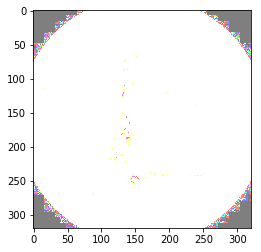

In [20]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
